In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import gamma
from scipy.special import erf
from scipy.signal import welch
import warnings
warnings.filterwarnings(action='ignore');
import rainflow

In [2]:
def H(f,fn,zeta):   # Input : Acceleration / Output : Relative Displacement
    return (1j*2*zeta*f*fn+fn**2)/((fn**2-f**2+1j*2*zeta*f*fn));

In [3]:
def HH(f,fn,zeta):   # Input : Acceleration / Output : Relative Displacement
    return np.abs(H(f,fn,zeta)*np.conjugate(H(f,fn,zeta)));

In [4]:
def log_interp(x,x_spec,y_spec):
    return 10**np.interp(np.log10(x),np.log10(x_spec),np.log10(y_spec));

In [5]:
def M(freq,psd,n):
    psd1 = psd*freq**n;
    return np.trapz(psd1,freq);

In [6]:
def psd2vrs(freq,psd,freq_tab,zeta):
    fi = np.linspace(min(freq),max(freq),10000);
    pi = log_interp(fi,freq,psd);
    grms = np.zeros(len(freq_tab));
    for i in range(len(freq_tab)):
        rpsd = pi*HH(fi,freq_tab[i],zeta);
        grms[i] = np.sqrt(M(fi,rpsd,0));
    return grms

In [7]:
freq = np.array([1,1000]); psd = np.array([1,1]);
freq_tab = np.linspace(1,1000,1000);
vrs = psd2vrs(freq,psd,freq_tab,0.05);

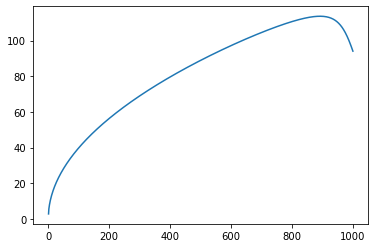

In [8]:
plt.plot(freq_tab,vrs);